<a href="https://colab.research.google.com/github/MuggsyCodes/Colab_Google_Notebooks/blob/main/Multiplot_%26_Data_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# *********** This program is written to address the following limitations with the standard data analysis program, mpAnalyzer *********** #
# During the test run, a user will push a 5 V trigger to signal an event of interest 
# It's important to be able to line up trigger signals from different runs in order to properly overlay the data
# The standard mpAnalyzer software package is unable to plot multiple graphs if they are of different lengths
# In addition, mpAnalyzer cannot time shift data even if the data is of the same lengths

#0. Import multiple data files 

#1. Plot both data files on the same graph

#2. shift one data file


import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Use LaTex for figure plots
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = 'serif'

# import txt file into data frame

# master path
m_path = r"/content/drive/MyDrive/Colab Notebooks"

file_1 = m_path+"/rms_accel_x_1.txt"
file_2 = m_path+"/rms_accel_x_2.txt"

# making data frame from TAB SEPARATED txt/csv file
data_1 = pd.read_csv(file_1, sep='\t', index_col=None) # Time [s]
data_2 = pd.read_csv(file_2, sep='\t', index_col=None) # X [s]

#print(data_1)
#print(data_2)

# concatenate data frames 
df = pd.concat([data_1, data_2], axis=1, ignore_index=False)

print(df)

# drop one of the redundant time axis
print("Data frame with single time axis")
df = df.drop(['X [s]'], axis=1)

print(df)


      Time [s]  Real [g]   X [s]  Real [g]
0         0.00  0.005395    0.00  0.005771
1         0.32  0.008768    0.32  0.007474
2         0.64  0.005373    0.64  0.012351
3         0.96  0.005442    0.96  0.006210
4         1.28  0.017902    1.28  0.014969
...        ...       ...     ...       ...
1263    404.16  0.011610  404.16  0.010604
1264    404.48  0.005853  404.48  0.017310
1265    404.80  0.005145  404.80  0.014607
1266    405.12  0.006487  405.12  0.009145
1267    405.44  0.013673  405.44  0.013004

[1268 rows x 4 columns]
Data frame with single time axis
      Time [s]  Real [g]  Real [g]
0         0.00  0.005395  0.005771
1         0.32  0.008768  0.007474
2         0.64  0.005373  0.012351
3         0.96  0.005442  0.006210
4         1.28  0.017902  0.014969
...        ...       ...       ...
1263    404.16  0.011610  0.010604
1264    404.48  0.005853  0.017310
1265    404.80  0.005145  0.014607
1266    405.12  0.006487  0.009145
1267    405.44  0.013673  0.013004

[1268

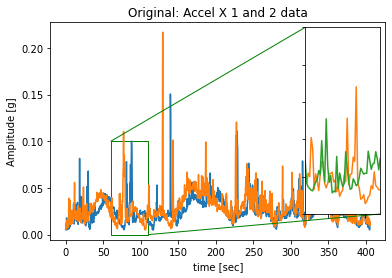

In [ ]:
#print("Original Data: ")

def multi_plot(data_1, data_2, df):
  '''data_1 and data_2 are data frames, df is concatenated data frame'''

  # supply a list of column names as the y variable
  ax = data_1.plot(x="Time [s]", y=["Real [g]"], kind="line", title='Original: Accel X 1 and 2 data')
  #plot 2nd plot on same axis 
  ax_2 = data_2.plot(x="X [s]", y=["Real [g]"], kind="line", ax = ax)


  # plot original data
  #plt.show()


  # Label the axis
  ax.set_xlabel('time [sec]')
  ax.set_ylabel('Amplitude [g]')


  # # ********* Zoom into section of data ************* #

  # select the x-range for zoomed-in region
  x1 = 60
  x2 = 110

  # select y-range for zoomed region
  y1 = 0.00
  y2 = 0.1

  # Create zoom-in plot window inset:
  axins = zoomed_inset_axes(ax, 2, loc=1) # this means zoom power = 2
  axins.plot(df)
  # define zoom window range x and y
  axins.set_xlim(x1, x2)
  axins.set_ylim(y1, y2)

  plt.xticks(visible=False)
  plt.yticks(visible=False)
  mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="green")

  plt.draw()
  plt.show()


  # use this to increase figure size inside of a notebook
  plt.rcParams['figure.figsize'] = [20, 14]


# Run multi-plot function
multi_plot(data_1, data_2, df)

In [ ]:
# data shift function
#def shift_data():
# calculate time between data points using integer location
a = data_2['X [s]'][0] #index by column and row
print(f"first slice:\n{a}")
b = data_2['X [s]'][1]
print(f"first slice:\n{b}")
delta = b-a
print(f"delta {delta}")

# calculate sampling frequency
sample_frequency = 1/delta
print(f"sampling frequency: {sample_frequency}")

# Calculate number shift points based on seconds 
# 1 sec = 3.125 shift points
# number shift points = shift seconds * 3.125

#!!! User input #!!!
user_input_seconds = int(input("How many seconds do you want to shift the data by?"))
# calculate shift points - use floor round
shift_points = round(user_input_seconds*3.125)
print(f"Shift points: {shift_points}")
  

first slice:
0.0
first slice:
0.32
delta 0.32
sampling frequency: 3.125
How many seconds do you want to shift the data by?30
Shift points: 94


In [ ]:
# Now, to shift the data frame that has a phase lag
# i.e., the data of interest starts later than the 0 reference I want to match it to
# phase lag correction requires: 
#slicing = data[0:shift_points] #row index: col index

#no_time_slice = data.iloc[0:shift_points, 1:] #row index: col index using iloc

# 1. start with selecting all columns MINUS the TIME column
no_time_slice = data_2.iloc[0:, 1:] #row index: col index using iloc


#create new series from X [s] time axis
time_frame = data_2.iloc[0:,0]

#print(slicing)
# 2. Take slice, EXCLUDING TIME column, delete it and move the values after the slice UP to the 0 position 

print(f"Time axis:\n{time_frame}")
print(type(time_frame))


print(no_time_slice)
print(type(no_time_slice))

Time axis:
0         0.00
1         0.32
2         0.64
3         0.96
4         1.28
         ...  
1263    404.16
1264    404.48
1265    404.80
1266    405.12
1267    405.44
Name: X [s], Length: 1268, dtype: float64
<class 'pandas.core.series.Series'>
      Real [g]
0     0.005771
1     0.007474
2     0.012351
3     0.006210
4     0.014969
...        ...
1263  0.010604
1264  0.017310
1265  0.014607
1266  0.009145
1267  0.013004

[1268 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
time_shift_df = time_frame.to_frame()
print(time_shift_df)
print(type(time_shift_df))

# shift all the columns of the LAGGING signal UP by the amount: time shift 
# set axis = 0 
new_df = no_time_slice.shift(-shift_points, axis = 0)
print(f"Shifted data:\n{new_df}")

       X [s]
0       0.00
1       0.32
2       0.64
3       0.96
4       1.28
...      ...
1263  404.16
1264  404.48
1265  404.80
1266  405.12
1267  405.44

[1268 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Shifted data:
      Real [g]
0     0.015165
1     0.015882
2     0.019525
3     0.024480
4     0.022854
...        ...
1263       NaN
1264       NaN
1265       NaN
1266       NaN
1267       NaN

[1268 rows x 1 columns]


In [ ]:
# append the shifted data frame as a new column to the time axis data frame
shifted_df = time_shift_df.join(new_df)
print(shifted_df)

       X [s]  Real [g]
0       0.00  0.015165
1       0.32  0.015882
2       0.64  0.019525
3       0.96  0.024480
4       1.28  0.022854
...      ...       ...
1263  404.16       NaN
1264  404.48       NaN
1265  404.80       NaN
1266  405.12       NaN
1267  405.44       NaN

[1268 rows x 2 columns]


In [ ]:
# join shifted data frame and data_1
df_2 = pd.concat([data_1, shifted_df], axis=1, ignore_index=False)
print(df_2)
# drop one of the redundant time axis
print("Data frame with single time axis")
df_2 = df_2.drop(['X [s]'], axis=1)
print(df_2)

      Time [s]  Real [g]   X [s]  Real [g]
0         0.00  0.005395    0.00  0.015165
1         0.32  0.008768    0.32  0.015882
2         0.64  0.005373    0.64  0.019525
3         0.96  0.005442    0.96  0.024480
4         1.28  0.017902    1.28  0.022854
...        ...       ...     ...       ...
1263    404.16  0.011610  404.16       NaN
1264    404.48  0.005853  404.48       NaN
1265    404.80  0.005145  404.80       NaN
1266    405.12  0.006487  405.12       NaN
1267    405.44  0.013673  405.44       NaN

[1268 rows x 4 columns]
Data frame with single time axis
      Time [s]  Real [g]  Real [g]
0         0.00  0.005395  0.015165
1         0.32  0.008768  0.015882
2         0.64  0.005373  0.019525
3         0.96  0.005442  0.024480
4         1.28  0.017902  0.022854
...        ...       ...       ...
1263    404.16  0.011610       NaN
1264    404.48  0.005853       NaN
1265    404.80  0.005145       NaN
1266    405.12  0.006487       NaN
1267    405.44  0.013673       NaN

[1268

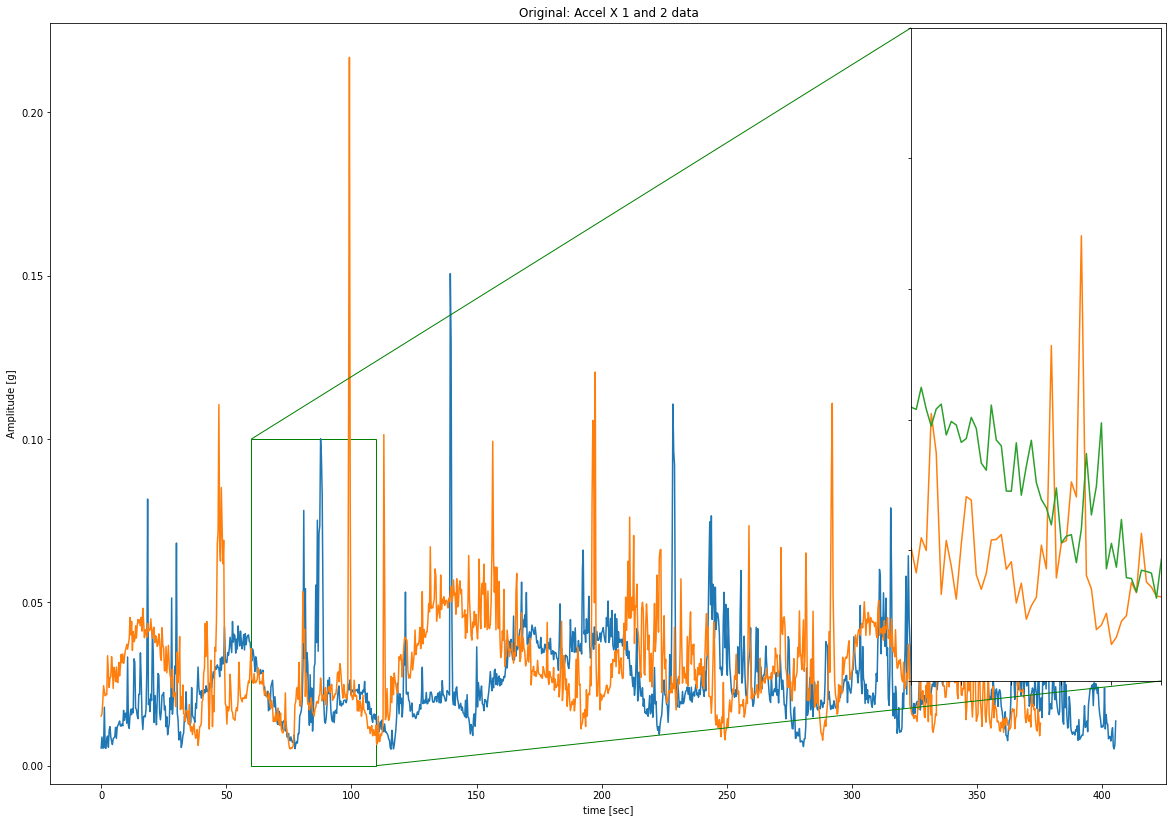

In [ ]:
multi_plot(data_1, shifted_df, df_2)